In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from matplotlib_venn import venn3


root_path = os.path.abspath(os.path.join(os.path.abspath(""), "../.."))

In [2]:
diabetes_typeII_gwas = pd.read_csv(f'{root_path}/data/gwas_annotations/diabetes_type2-genes.csv')

In [3]:
SNPs_annotations = pd.read_csv(f'{root_path}/data/genotype_information/SNP_annotation.csv')
GENE_COORDINATES = pd.read_csv(f'{root_path}/data/genome_annotations/sgd_database/orf_coding_R64-3-1.csv')

In [4]:
SNPs_annotations

,SNP,locus_id,GENE,sgd_id,snps_class_down,description,Human homolog
0,1,X1L_NFR/NDR,NaN,NaN,Promoter,NaN,NaN
1,2,X1L_NFR/NDR,NaN,NaN,Promoter,NaN,NaN
2,3,YAL069W,YAL069W,SGDID:S000002143,Close to 3'-UTR,"""Dubious open reading frame; unlikely to encod...",NaN
3,4,YAL069W,YAL069W,SGDID:S000002143,Close to 3'-UTR,"""Dubious open reading frame; unlikely to encod...",NaN
4,5,YAL069W,YAL069W,SGDID:S000002143,Close to 3'-UTR,"""Dubious open reading frame; unlikely to encod...",NaN
...,...,...,...,...,...,...,...
12001,12050,Q0250,COX2,SGDID:S000007281,Close to 3'-UTR,"""Subunit II of cytochrome c oxidase (Complex I...",NaN
12002,12051,Q0250,COX2,SGDID:S000007281,Close to 3'-UTR,"""Subunit II of cytochrome c oxidase (Complex I...",NaN
12003,12052,Q:77506-78088,NaN,NaN,Intergenic region,between YNCQ0023W and YNCQ0024C,NaN
12004,12053,Q:82601-85034,NaN,NaN,Intergenic region,between ORI5 and YNCQ0026W,NaN


In [5]:
SNPs_annotations = SNPs_annotations.rename(columns={'locus_id':'SNPs_localization'})
SNPs_annotations['CLOSEST_LOCUS_ID'] = [ SNPs_annotations['SNPs_localization'][idx].replace('_NFR/NDR','') for idx in SNPs_annotations.index ]
SNPs_annotations = SNPs_annotations[['SNP', 'SNPs_localization', 'GENE', 'CLOSEST_LOCUS_ID', 'snps_class_down']].merge(GENE_COORDINATES[['locus_id', 'name', 'description']], left_on='CLOSEST_LOCUS_ID', right_on='locus_id', how='outer')
SNPs_annotations = SNPs_annotations.dropna(subset=['SNP']).rename(columns={'name':'CLOSEST_GENE'})
SNPs_annotations = SNPs_annotations.drop(columns=['locus_id'])

In [6]:
ORTHOLOGS = pd.read_csv(f'{root_path}/data/gwas_annotations/ORTHOLOGY-ALLIANCE_COMBINED.tsv', comment='#', sep='\t')
HUMAN_GENE_DESCRIPTION = pd.read_csv(f'{root_path}/data/gwas_annotations/GENE-DESCRIPTION-TSV_HUMAN.tsv', sep='\t', comment='#', names=['HG_ID', 'HG_Symbol', 'Description'])
HUMAN_vs_YEAST = ORTHOLOGS[(ORTHOLOGS['Gene1SpeciesName'] == "Homo sapiens") & (ORTHOLOGS['Gene2SpeciesName'] == "Saccharomyces cerevisiae")]

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/work/data/gwas_annotations/ORTHOLOGY-ALLIANCE_COMBINED.tsv'

In [ ]:
len(np.unique(HUMAN_vs_YEAST['Gene1Symbol']))

4750

In [ ]:
len(np.unique(HUMAN_vs_YEAST['Gene2Symbol']))

3240

In [ ]:
def get_description(x):
    description = []
    gene_list = x.split(', ')
    for GENE in gene_list : 
        TMP = HUMAN_GENE_DESCRIPTION[HUMAN_GENE_DESCRIPTION['HG_Symbol'] == GENE ]
        DESC = TMP['Description'].values[0]
        description.append(DESC)
    return ' ; '.join(description)


def is_diabetes_II_gene(x):
    gene_list = x.split(', ')
    for GENE in gene_list : 
        if GENE in set(diabetes_typeII_gwas['Human_Gene_name'].values) :
            return 1 
        else : 
            return 0 

In [ ]:
get_description('SLC25A5, SLC25A31, SLC25A6, SLC25A4')

"Enables adenine nucleotide transmembrane transporter activity and ubiquitin protein ligase binding activity. Involved in adenine nucleotide transport; negative regulation of mitochondrial outer membrane permeabilization involved in apoptotic signaling pathway; and positive regulation of cell population proliferation. Located in membrane and mitochondrial nucleoid. Part of MMXD complex. ; Predicted to enable ATP:ADP antiporter activity. Predicted to be involved in male gamete generation; mitochondrial ATP transmembrane transport; and negative regulation of mitochondrial outer membrane permeabilization involved in apoptotic signaling pathway. Located in membrane and mitochondrion. ; Predicted to enable ATP:ADP antiporter activity. Predicted to be involved in mitochondrial ATP transmembrane transport and negative regulation of mitochondrial outer membrane permeabilization involved in apoptotic signaling pathway. Located in membrane and mitochondrion. ; Enables ATP:ADP antiporter activity

In [ ]:
GENE_HOMOLOGS_ONE_LINE = []
for GENE in np.unique(HUMAN_vs_YEAST['Gene2Symbol']):
    GENE_HOMOLOGS_ONE_LINE.append([GENE, ', '.join(HUMAN_vs_YEAST[HUMAN_vs_YEAST['Gene2Symbol'] == GENE]['Gene1Symbol'].values)])

In [ ]:
YEAST_vs_HUMAN_ONE_LINE = pd.DataFrame(GENE_HOMOLOGS_ONE_LINE, columns=['CLOSEST_GENE', 'Human_homologs'])

In [ ]:
YEAST_vs_HUMAN_ONE_LINE['Human_Gene_Description'] = YEAST_vs_HUMAN_ONE_LINE['Human_homologs'].apply(get_description)

In [ ]:
YEAST_vs_HUMAN_ONE_LINE['Diabetes_Type_II'] = YEAST_vs_HUMAN_ONE_LINE['Human_homologs'].apply(is_diabetes_II_gene)

In [ ]:
YEAST_vs_HUMAN_ONE_LINE

,CLOSEST_GENE,Human_homologs,Human_Gene_Description,Diabetes_Type_II
0,AAC1,"SLC25A5, SLC25A31, SLC25A6, SLC25A4",Enables adenine nucleotide transmembrane trans...,0
1,AAC3,"SLC25A5, SLC25A6, SLC25A31, SLC25A4",Enables adenine nucleotide transmembrane trans...,0
2,AAD14,"AKR7A3, AKR7L, AKR7A2",Enables identical protein binding activity. Pr...,0
3,AAH1,ADA,Enables 2'-deoxyadenosine deaminase activity; ...,0
4,AAP1,"NPEPPSP1, NPEPPS",Predicted to enable metalloaminopeptidase acti...,0
...,...,...,...,...
3235,ZRT1,"SLC39A2, SLC39A3, SLC39A1",Enables zinc ion transmembrane transporter act...,0
3236,ZRT2,"SLC39A2, SLC39A3, SLC39A1",Enables zinc ion transmembrane transporter act...,0
3237,ZTA1,CRYZ,"Enables several functions, including NADPH bin...",0
3238,ZUO1,DNAJC2,Enables Hsp70 protein binding activity; chroma...,0


In [ ]:
SNPs_annotations_with_homologs = SNPs_annotations[['SNP', 'SNPs_localization', 'GENE', 'snps_class_down', 'CLOSEST_GENE', 'description']].merge(YEAST_vs_HUMAN_ONE_LINE, on='CLOSEST_GENE', how='outer')
SNPs_annotations_with_homologs = SNPs_annotations_with_homologs.dropna(subset=['SNP'])
SNPs_annotations_with_homologs['SNP'] = SNPs_annotations_with_homologs['SNP'].astype(int)

In [ ]:
len(SNPs_annotations_with_homologs['Human_homologs'].dropna())

5372

In [ ]:
SNPs_annotations_with_homologs.sort_values('SNP')

,SNP,SNPs_localization,GENE,snps_class_down,CLOSEST_GENE,description,Human_homologs,Human_Gene_Description,Diabetes_Type_II
0,1,X1L_NFR/NDR,NaN,Promoter,NaN,NaN,NaN,NaN,NaN
1,2,X1L_NFR/NDR,NaN,Promoter,NaN,NaN,NaN,NaN,NaN
1689,3,YAL069W,YAL069W,Close to 3'-UTR,YAL069W,"""Dubious open reading frame; unlikely to encod...",NaN,NaN,NaN
1690,4,YAL069W,YAL069W,Close to 3'-UTR,YAL069W,"""Dubious open reading frame; unlikely to encod...",NaN,NaN,NaN
1691,5,YAL069W,YAL069W,Close to 3'-UTR,YAL069W,"""Dubious open reading frame; unlikely to encod...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12004,12050,Q0250,COX2,Close to 3'-UTR,COX2,"""Subunit II of cytochrome c oxidase (Complex I...","MTCO2P12, MT-CO2",Contributes to cytochrome-c oxidase activity. ...,0.0
12005,12051,Q0250,COX2,Close to 3'-UTR,COX2,"""Subunit II of cytochrome c oxidase (Complex I...","MTCO2P12, MT-CO2",Contributes to cytochrome-c oxidase activity. ...,0.0
1686,12052,Q:77506-78088,NaN,Intergenic region,NaN,NaN,NaN,NaN,NaN
1687,12053,Q:82601-85034,NaN,Intergenic region,NaN,NaN,NaN,NaN,NaN


In [ ]:
SNPs_annotations_with_homologs.sort_values('SNP').to_csv(f'{root_path}/data/genotype_information/SNP_annotation_with_yeast_description_and_human_homologs_description_diabetes_type_II.csv', index=False)

In [ ]:
metformin_results = pd.read_csv(f'{root_path}/data/tables/S5_Metformin.csv')

In [ ]:
metformin_results['locus_id'] = [ metformin_results['locus_id'][idx].replace('_NFR/NDR','') for idx in metformin_results.index ]
metformin_results = metformin_results.merge(GENE_COORDINATES[['locus_id', 'name']], on='locus_id', how='outer')
metformin_results = metformin_results.dropna(subset=['snps_class_down'])
metformin_results['SNP'] =  metformin_results['SNP'].astype(int) 

In [ ]:
metformin_results = metformin_results.rename(columns={'name':'Gene2Symbol'})
metformin_results_homologs_annotated = metformin_results.merge(HUMAN_vs_YEAST[['Gene1Symbol', 'Gene2Symbol']], on='Gene2Symbol', how='outer')
metformin_results_homologs_annotated = metformin_results_homologs_annotated.dropna(subset=['snps_class_down'])
metformin_results_homologs_annotated['SNP'] =  metformin_results_homologs_annotated['SNP'].astype(int) 

In [ ]:
metformin_results_homologs_annotated

,SNP,locus_id,snps_class_down,Gene2Symbol,Gene1Symbol
0,10435,SUT777,Promoter,NaN,NaN
1,12031,Q:32502-35372,Intergenic region,NaN,NaN
2,1002,YCLWdelta2b,Promoter,NaN,NaN
3,990,YCLWdelta2b,Promoter,NaN,NaN
4,992,YCLWdelta2b,Promoter,NaN,NaN
...,...,...,...,...,...
17148,10515,YOR115C,Promoter,TRS33,TRAPPC6B
17149,10515,YOR115C,Promoter,TRS33,TRAPPC6A
17150,647,YBR144C,Close to 3'-UTR,YBR144C,NaN
17151,7585,YLR007W,Close to 3'-UTR,NSE1,NSMCE1


In [ ]:
metformin_results_homologs_annotated = metformin_results_homologs_annotated.dropna(subset=['Gene2Symbol'])

In [ ]:
metformin_results_homologs_annotated = metformin_results_homologs_annotated.rename(columns={'Gene2Symbol':'yeast_gene_name', 'Gene1Symbol':'human_gene_name'})
metformin_results_homologs_annotated.to_csv('S5_Metformin_homologs_annotated.csv', index=False)

In [ ]:
#### Loading all SNPs annotations
all_ORF_SNPs = pd.read_csv(f'{root_path}/data/genotype_information/snps_annotations_genome-version-3-64-1.txt')
print('Number of SNPs on ORF:', len(all_ORF_SNPs[all_ORF_SNPs['snps_class_up'] == 'ORF']))
ORF_with_SNPs = all_ORF_SNPs[all_ORF_SNPs['snps_class_up'] == 'ORF']['locus_id'].values

Number of SNPs on ORF: 6314


In [ ]:
#### Loading human and yeast orthologs
human_homologs = pd.read_csv(f'{root_path}/data/gwas_annotations/Yeast_vs_Human_Homologs.txt', sep='\t')
yeast_homologs_with_snps = set(human_homologs['Yeast_Gene_stable_ID']) & set(ORF_with_SNPs)
print(len(yeast_homologs_with_snps))

1290


In [ ]:
human_homologs[human_homologs['Yeast_Gene_stable_ID'].isin(yeast_homologs_with_snps)].reset_index(drop=True) # .to_csv('../data/gwas_annotations/Yeast_vs_Human_Homologs_with_annotated_SNPs.txt', sep='\t', index=False)

,Yeast_Gene_stable_ID,Yeast_Gene_name,Human_Gene_stable_ID,Human_Gene_name
0,YER101C,AST2,ENSG00000205758,CRYZL1
1,YDR247W,VHS1,ENSG00000142149,HUNK
2,YLR142W,PUT1,ENSG00000277196,NaN
3,YKL014C,URB1,ENSG00000142207,URB1
4,YCL025C,AGP1,ENSG00000139514,SLC7A1
...,...,...,...,...
3547,YKL184W,SPE1,ENSG00000115758,ODC1
3548,YML098W,TAF13,ENSG00000197780,TAF13
3549,YPL224C,MMT2,ENSG00000196660,SLC30A10
3550,YLR229C,CDC42,ENSG00000070831,CDC42


In [ ]:
#### Loading Metformin meta-analysis results

for DRUG in ['5-FC', 'Fluconazole', 'Metformin', 'Trifluoperazine']:
    meta_analysis_results = pd.read_csv(f'{root_path}/data/meta_analysis/qassoc_{DRUG}.csv', sep='\t')
    meta_analysis_results = meta_analysis_results.replace(26, 'MT')
    meta_analysis_results = meta_analysis_results.merge(all_ORF_SNPs[['snp_id', 'snps_class_up', 'locus_id', 'name', 'description']], left_on='SNP', right_on='snp_id')
    meta_analysis_results = meta_analysis_results[['CHR', 'BP', 'SNP', 'N', 'P', 'P(R)', 'OR', 'OR(R)', 'I', 'snps_class_up','locus_id', 'name', 'description']]
    meta_analysis_results.to_csv(f'{root_path}/data/meta_analysis/qassoc_{DRUG}_with_annotations.csv', sep='\t', index=False)

In [ ]:
meta_analysis_results

,Unnamed: 0,CHR,BP,SNP,N,P,P(R),OR,OR(R),Q,I,snp_id,snps_class_up,locus_id,name,description
0,NaN,1,1025,1,62,2.493000e-14,2.493000e-14,0.1591,0.1591,1.0000,0.0,1,Promoter,X1L_NFR/NDR,NaN,NaN
1,NaN,1,1035,2,62,6.812000e-07,6.812000e-07,0.1049,0.1049,1.0000,0.0,2,Promoter,X1L_NFR/NDR,NaN,NaN
2,NaN,1,1074,3,62,4.896000e-05,4.896000e-05,0.1450,0.1450,0.9997,0.0,3,Close to 3'-UTR,YAL069W,YAL069W,"""Dubious open reading frame; unlikely to encod..."
3,NaN,1,1470,4,62,7.052000e-01,7.052000e-01,-0.0135,-0.0135,0.9982,0.0,4,Close to 3'-UTR,YAL069W,YAL069W,"""Dubious open reading frame; unlikely to encod..."
4,NaN,1,1475,5,62,1.514000e-06,1.514000e-06,0.1263,0.1263,1.0000,0.0,5,Close to 3'-UTR,YAL069W,YAL069W,"""Dubious open reading frame; unlikely to encod..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12045,NaN,MT,74432,12050,62,9.214000e-07,9.214000e-07,0.0860,0.0860,1.0000,0.0,12050,Close to 3'-UTR,Q0250,COX2,"""Subunit II of cytochrome c oxidase (Complex I..."
12046,NaN,MT,74433,12051,62,1.148000e-05,1.148000e-05,-0.1069,-0.1069,1.0000,0.0,12051,Close to 3'-UTR,Q0250,COX2,"""Subunit II of cytochrome c oxidase (Complex I..."
12047,NaN,MT,77708,12052,62,5.946000e-06,5.946000e-06,0.3550,0.3550,1.0000,0.0,12052,Intergenic region,Q:77506-78088,NaN,between YNCQ0023W and YNCQ0024C
12048,NaN,MT,84245,12053,62,1.543000e-03,1.543000e-03,0.1351,0.1351,1.0000,0.0,12053,Intergenic region,Q:82601-85034,NaN,between ORI5 and YNCQ0026W


In [ ]:
-np.log10(1e-30)

30.0

/home/savvy/bin/miniconda3/envs/piQTL/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='P', ylabel='Count'>

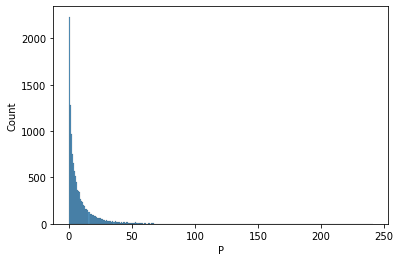

In [ ]:
import seaborn as sns 
sns.histplot(- np.log10(metformin_meta_analysis_results['P']))

In [ ]:
metformin_ma_hits = metformin_meta_analysis_results[(metformin_meta_analysis_results['P'] < 1e-10) & (metformin_meta_analysis_results['snps_class_up'] == 'ORF')].sort_values('P').drop_duplicates(subset='locus_id', keep='first')['locus_id'].values 
metformin_yeast_homologs_with_snps = set(yeast_homologs_with_snps) & set(metformin_ma_hits)
print(len(metformin_ma_hits))

927


In [ ]:
#### Loading GWAS hits on diabetes type II
diabetes_typeII_gwas = pd.read_csv(f'{root_path}/data/gwas_annotations/diabetes_type2-genes.csv')
human_diabetesII_QTLs = diabetes_typeII_gwas[~diabetes_typeII_gwas['Human_Gene_name'].str.contains('-')].drop_duplicates(('Human_Gene_name'))['Human_Gene_name']
yeast_diabetes_II_homologs = human_homologs[human_homologs['Human_Gene_name'].isin(human_diabetesII_QTLs)]['Yeast_Gene_stable_ID']
yeast_diabetes_II_homologs_with_snps = set(yeast_diabetes_II_homologs) & set(ORF_with_SNPs)
print(len(yeast_diabetes_II_homologs_with_snps))

89


In [ ]:
human_homologs[human_homologs['Yeast_Gene_stable_ID'].isin(yeast_diabetes_II_homologs)] # .to_csv('../data/gwas_annotations/Yeast_vs_Human_Homologs_associated_with_diabetes_type_II.txt', sep='\t', index=False)

,Yeast_Gene_stable_ID,Yeast_Gene_name,Human_Gene_stable_ID,Human_Gene_name
16,YMR011W,HXT2,ENSG00000197496,SLC2A10
18,YGR108W,CLB1,ENSG00000133101,CCNA1
21,YMR199W,CLN1,ENSG00000133101,CCNA1
24,YPR120C,CLB5,ENSG00000133101,CCNA1
29,YHR096C,HXT5,ENSG00000197496,SLC2A10
...,...,...,...,...
6660,YJL083W,TAX4,ENSG00000085832,EPS15
6662,YOL081W,IRA2,ENSG00000075391,RASAL2
6679,YDR345C,HXT3,ENSG00000117394,SLC2A1
6680,YPL224C,MMT2,ENSG00000196660,SLC30A10


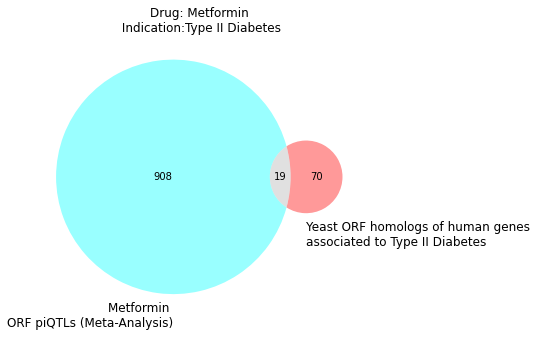

In [ ]:
CM = 1/2.54 # centimeters in inches

f = plt.figure(figsize=(15*CM, 15*CM))
out = venn2([set(metformin_ma_hits), set(yeast_diabetes_II_homologs_with_snps)], set_colors =('cyan','red'), set_labels=['Metformin \nORF piQTLs (Meta-Analysis)', 'Yeast ORF homologs of human genes \nassociated to Type II Diabetes'])
plt.title('Drug: Metformin\n Indication:Type II Diabetes')
plt.show()
# f.savefig('../manuscript/figures/FIGURE_3/FIGURE_3A.pdf', dpi=300)
# f.savefig('../manuscript/figures/FIGURE_3/FIGURE_3A.eps', dpi=300)

In [ ]:
res = []
for locus_id in (set(metformin_yeast_homologs_with_snps) & set(yeast_diabetes_II_homologs_with_snps)):
    TMP = metformin_meta_analysis_results[(metformin_meta_analysis_results['locus_id'] == locus_id)]
    if len(TMP) != 0 :
        res.append(TMP[['SNP', 'P', 'locus_id', 'name', 'description']])


TABLE = pd.concat(res).sort_values('P').drop_duplicates(subset='locus_id', keep='first')
print(TABLE)
# TABLE.to_csv('./metformin_ma_overlapping_hits.csv', index=False)

         SNP              P locus_id   name  \
10424  10426  3.766000e-103  YOR058C   ASE1   
11540  11542   1.090000e-68  YPL085W  SEC16   
5778    5780   7.589000e-49  YIL048W   NEO1   
9448    9450   1.016000e-29  YNL197C   WHI3   
10192  10194   2.282000e-25  YOL081W   IRA2   
9099    9101   4.633000e-25  YMR243C   ZRC1   
4598    4600   1.517000e-23  YGR170W   PSD2   
6128    6130   3.693000e-23  YJL093C   TOK1   
9268    9270   1.100000e-22  YNL329C   PEX6   
6994    6996   4.220000e-18  YKL127W   PGM1   
8786    8788   4.690000e-18  YMR105C   PGM2   
2415    2417   3.060000e-17  YDR342C   HXT7   
9992    9994   5.448000e-17  YNR072W  HXT17   
11364  11366   5.558000e-15  YPL176C   TRE1   
8304    8306   8.057000e-15  YLR422W   DCK1   
770      772   3.766000e-13  YBR241C   VVS1   
459      461   4.223000e-12  YBR041W   FAT1   
1471    1473   7.831000e-12  YDL141W   BPL1   
5146    5148   1.774000e-11  YHR090C   YNG2   

                                             description  


In [ ]:
TABLE

,SNP,P,locus_id,name,description
10424,10426,3.766000e-103,YOR058C,ASE1,"""Mitotic spindle midzone-localized microtubule..."
11540,11542,1.090000e-68,YPL085W,SEC16,"""COPII vesicle coat protein required for ER tr..."
5778,5780,7.589000e-49,YIL048W,NEO1,"""Phospholipid translocase (flippase) ; role in..."
9448,9450,1.016000e-29,YNL197C,WHI3,"""RNA binding protein that modulates mRNA stabi..."
10192,10194,2.282000e-25,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
9099,9101,4.633000e-25,YMR243C,ZRC1,"""Vacuolar membrane zinc transporter; transport..."
4598,4600,1.517000e-23,YGR170W,PSD2,"""Phosphatidylserine decarboxylase of the Golgi..."
6128,6130,3.693000e-23,YJL093C,TOK1,"""Outward-rectifier potassium channel of the pl..."
9268,9270,1.100000e-22,YNL329C,PEX6,"""AAA-peroxin; heterodimerizes with AAA-peroxin..."
6994,6996,4.220000e-18,YKL127W,PGM1,"""Phosphoglucomutase ; minor isoform; catalyzes..."


In [ ]:
TABLE.merge(human_homologs, left_on='locus_id', right_on='Yeast_Gene_stable_ID').to_csv('./metformin_ma_overlapping_hits_with_human_homologs.csv', index=False)

In [ ]:
#### Loading piQTL results
piQTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/significant_piQTLs_results_with_genome_annotations_without_MTX_peaks.csv')

In [ ]:
metformin_hits = pd.read_csv(f'{root_path}/data/gwas_annotations/Metformin_all.csv')

In [ ]:
highest_pvals = piQTLs[(piQTLs['Condition'].str.contains('Metformin')) & (piQTLs['snps_class_up'] == 'ORF') & (piQTLs['locus_id'].isin(metformin_hits['locus_id']))].sort_values('-log_pval', ascending=False).drop_duplicates(subset=['locus_id'], keep='first')[['locus_id','p-value_eQTL', 'p-value_rMVP', '-log_pval','FDR', 'Condition']]

In [ ]:
# metformin_hits.merge(highest_pvals, on='locus_id', how='outer').sort_values('-log_pval', ascending=False).to_csv('../results/06_GWAS_overlapping/metformin_significant_hits.csv', index=False)

In [ ]:
#### Loading human and yeast orthologs
human_homologs = pd.read_csv(f'{root_path}/data/gwas_annotations/Yeast_vs_Human_Homologs.txt', sep='\t')

In [ ]:
crispr_hits_4d = pd.read_csv(f'{root_path}/data/gwas_annotations/ferroptosis_hits_4d.csv')
crispr_hits_8d = pd.read_csv(f'{root_path}/data/gwas_annotations/ferroptosis_hits_8d.csv')
crispr_hits_12d = pd.read_csv(f'{root_path}/data/gwas_annotations/ferroptosis_hits_12d.csv')
all_genes_crispr = set(crispr_hits_4d['Gene_symbol']) | set(crispr_hits_8d['Gene_symbol']) | set(crispr_hits_12d['Gene_symbol'])

In [ ]:
yeast_ferrotopsis_homologs = human_homologs[human_homologs['Human_Gene_name'].isin(all_genes_crispr)]['Yeast_Gene_stable_ID']

In [ ]:
#### Loading piQTL results
piQTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/significant_piQTLs_results_with_genome_annotations_without_MTX_peaks.csv')
ES_piQTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/ES_vs_NES/Metformin_ES_piQTLs.csv')
NES_piQTLs = pd.read_csv(f'{root_path}/results/05_piQTL_tables/ES_vs_NES/Metformin_NES_piQTLs.csv')

all_ORF_SNPs = pd.read_csv(f'{root_path}/data/genotype_information/snps_annotations_genome-version-3-64-1.txt')
print('Number of SNPs on ORF:', len(all_ORF_SNPs[all_ORF_SNPs['snps_class_up'] == 'ORF']))
ORF_with_SNPs = all_ORF_SNPs[all_ORF_SNPs['snps_class_up'] == 'ORF']['locus_id'].values

yeast_ES_piQTLs = [ gene for gene in np.unique(ES_piQTLs[(ES_piQTLs['snps_class_up'] == 'ORF')]['locus_id']) ]
yeast_homologs_with_snps = set(human_homologs['Yeast_Gene_stable_ID'])
yeast_ES_piQTLs_with_homologs = set(yeast_ES_piQTLs) & set(yeast_homologs_with_snps)

Number of SNPs on ORF: 6314


Text(0.5, 1.0, 'Drug: Metformin\n Indication:Ferroptosis')

<Figure size 425.197x425.197 with 0 Axes>

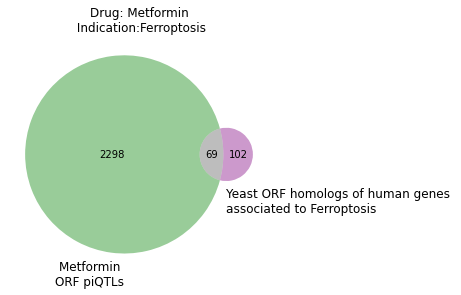

In [ ]:
CM = 1/2.54 # centimeters in inches
f = plt.figure(figsize=(15 * CM, 15 * CM))
CM = 1/2.54 # centimeters in inches
QUARTER = 4.5 * CM
THIRD = 6 * CM
HALF = 9 * CM
WHOLE = 12 * CM

f = plt.figure(figsize=(WHOLE, WHOLE))
out = venn2([set(metformin_ma_hits), set(yeast_ferrotopsis_homologs)], set_colors =('green','purple'), set_labels=['Metformin \nORF piQTLs', 'Yeast ORF homologs of human genes \nassociated to Ferroptosis'])
plt.title('Drug: Metformin\n Indication:Ferroptosis')

In [ ]:
res = []
for locus_id in (set(yeast_ES_piQTLs) & set(yeast_ferrotopsis_homologs)):
    print(locus_id)
    TMP = piQTLs[(piQTLs['locus_id'] == locus_id) & (piQTLs['Condition'].str.contains('Metformin'))]
    if len(TMP) != 0 :
        print(locus_id)
        res.append(TMP[['SNP', 'Condition', 'Chr', 'Pos', '-log_pval', 'locus_id', 'name', 'description']])


TABLE = pd.concat(res)

TABLE

YOL081W
YOL081W
YNL233W
YNL233W
YNR065C
YNR065C
YIL048W
YIL048W
YOL078W
YOL078W
YDR247W
YDR247W


,SNP,Condition,Chr,Pos,-log_pval,locus_id,name,description
394,10192,SRO9_GIS2_MTX_Metformin,15,172074,5.682075,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
441,10191,SRO9_GIS2_MTX_Metformin,15,171671,5.330008,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
679,10193,SRO9_GIS2_MTX_Metformin,15,172102,5.060852,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
762,10195,SRO9_GIS2_MTX_Metformin,15,179652,5.049796,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
818,10194,SRO9_GIS2_MTX_Metformin,15,173340,4.957851,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
1092,10190,SRO9_GIS2_MTX_Metformin,15,171150,4.442918,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
3218,10191,HNM1_RBD2_MTX_Metformin,15,171671,3.558138,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
3584,10194,HNM1_MAM33_MTX_Metformin,15,173340,3.665509,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
5733,10190,HNM1_RBD2_MTX_Metformin,15,171150,3.232256,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."
8417,10195,HNM1_MAM33_MTX_Metformin,15,179652,3.096914,YOL081W,IRA2,"""GTPase-activating protein; negatively regulat..."


In [ ]:
import scipy.stats as stats

In [ ]:
N = 2666
n = 165
K = 68
k = 6
print(stats.hypergeom.pmf(k, N, K, n))

  
# creating data
data = [[6, 68], [165, 2666]]
  
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data, alternative='two-sided')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

0.11801334707916296
odd ratio is : 1.425668449197861
p_value is : 0.4459210357714707
